In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [105]:
#df=pd.read_csv('https://raw.githubusercontent.com/MerEsf/Practical_Machine_Learning/master/pml-training.csv')
#df.to_csv('weight_training.csv')
df=pd.read_csv('weight_training.csv')



C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (12,15,20,23,26,71,74,87,88,90,91,95,98,101) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [147]:
NUMERIC=[item for item in df.select_dtypes([np.number]).columns ]
sel = VarianceThreshold(threshold=.05)
sel.fit(df[NUMERIC]/df[NUMERIC].mean())

mask=sel.get_support()
#print(mask)

reduced_df=df[NUMERIC].loc[:,mask]
variance_columns=[item for item in reduced_df.columns]

#print(variance_columns)

columns_to_drop=[item for item in NUMERIC if item not in variance_columns]
print(columns_to_drop)
df=df.drop(columns_to_drop,axis=1)
print(df.columns)


[]
Index(['Unnamed: 0', 'Unnamed: 0.1', 'user_name', 'raw_timestamp_part_2',
       'cvtd_timestamp', 'new_window', 'num_window', 'roll_belt', 'pitch_belt',
       'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=158)


In [163]:
#https://rstudio-pubs-static.s3.amazonaws.com/230066_902d438b84794c6cb5585496ebc82119.html
LABELS=['yaw_belt','num_window','roll_belt','magnet_dumbbell_z','pitch_belt','magnet_dumbbell_y','accel_dumbbell_y','pitch_forearm','roll_arm','roll_dumbbell','accel_dumbbell_z']
#LABELS=['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt', 'max_roll_belt', 'min_roll_belt', 'min_pitch_belt', 'amplitude_roll_belt', 'amplitude_pitch_belt', 'var_total_accel_belt', 'avg_roll_belt', 'stddev_roll_belt', 'var_roll_belt', 'avg_pitch_belt', 'stddev_pitch_belt', 'var_pitch_belt', 'avg_yaw_belt', 'stddev_yaw_belt', 'var_yaw_belt', 'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x', 'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'roll_arm', 'pitch_arm', 'yaw_arm', 'var_accel_arm', 'avg_roll_arm', 'stddev_roll_arm', 'var_roll_arm', 'avg_pitch_arm', 'stddev_pitch_arm', 'var_pitch_arm', 'avg_yaw_arm', 'stddev_yaw_arm', 'var_yaw_arm', 'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'max_roll_arm', 'max_picth_arm', 'min_roll_arm', 'min_pitch_arm', 'amplitude_roll_arm', 'amplitude_pitch_arm', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell', 'max_roll_dumbbell', 'max_picth_dumbbell', 'min_roll_dumbbell', 'min_pitch_dumbbell', 'amplitude_roll_dumbbell', 'amplitude_pitch_dumbbell', 'total_accel_dumbbell', 'var_accel_dumbbell', 'avg_roll_dumbbell', 'stddev_roll_dumbbell', 'var_roll_dumbbell', 'avg_pitch_dumbbell', 'stddev_pitch_dumbbell', 'var_pitch_dumbbell', 'avg_yaw_dumbbell', 'stddev_yaw_dumbbell', 'var_yaw_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'max_roll_forearm', 'max_picth_forearm', 'min_roll_forearm', 'min_pitch_forearm', 'amplitude_roll_forearm', 'amplitude_pitch_forearm', 'var_accel_forearm', 'avg_roll_forearm', 'stddev_roll_forearm', 'var_roll_forearm', 'avg_pitch_forearm', 'stddev_pitch_forearm', 'var_pitch_forearm', 'avg_yaw_forearm', 'stddev_yaw_forearm', 'var_yaw_forearm', 'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z']

encoder=LabelEncoder()
X=df[LABELS]
y=encoder.fit_transform(df['classe'])

In [164]:
#for column in df.columns:
#    print(column)
    


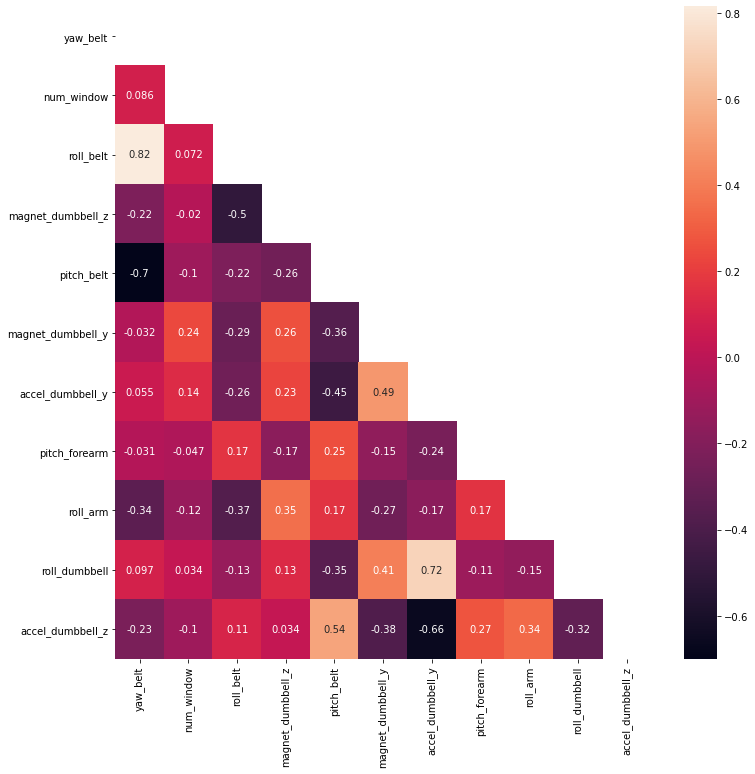

In [165]:
corr=df[LABELS].corr()

mask=np.triu(np.ones_like(corr,dtype=bool))

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,mask=mask)
plt.show()

In [166]:
print("Unilateral Dumbbell Biceps Curl in five different fashions: exactly according to the specification (Class A), throwing the elbows to the front (Class B), lifting the dumbbell only halfway (Class C), lowering the dumbbell only halfway (Class D) and throwing the hips to the front (Class E).")

Unilateral Dumbbell Biceps Curl in five different fashions: exactly according to the specification (Class A), throwing the elbows to the front (Class B), lifting the dumbbell only halfway (Class C), lowering the dumbbell only halfway (Class D) and throwing the hips to the front (Class E).


In [167]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [168]:
rfe=RFE(estimator=LogisticRegression(), n_features_to_select=2, verbose=1)

scaler = StandardScaler()
X_train_std= scaler.fit_transform(X_train)

rfe.fit(X_train_std, y_train)

X.columns[rfe.support_]



Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
{'yaw_belt': 1, 'num_window': 8, 'roll_belt': 1, 'magnet_dumbbell_z': 6, 'pitch_belt': 2, 'magnet_dumbbell_y': 9, 'accel_dumbbell_y': 4, 'pitch_forearm': 3, 'roll_arm': 10, 'roll_dumbbell': 7, 'accel_dumbbell_z': 5}


In [174]:
my_ranking=(dict(zip(X.columns,rfe.ranking_)))
print({k: v for k, v in sorted(my_ranking.items(), key=lambda item: item[1])})
#print(sorted(my_ranking.keys()))


{'yaw_belt': 1, 'roll_belt': 1, 'pitch_belt': 2, 'pitch_forearm': 3, 'accel_dumbbell_y': 4, 'accel_dumbbell_z': 5, 'magnet_dumbbell_z': 6, 'roll_dumbbell': 7, 'num_window': 8, 'magnet_dumbbell_y': 9, 'roll_arm': 10}


In [176]:
pipeline= Pipeline([
   ('scaler',StandardScaler()),
    ('pca', PCA()),
   ('clf',RandomForestClassifier(n_estimators=400,max_depth=32,min_samples_leaf=2, max_features=2, random_state=42))
])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('clf',
                 RandomForestClassifier(max_depth=32, max_features=2,
                                        min_samples_leaf=2, n_estimators=400,
                                        random_state=42))])

In [177]:
#print(pipeline['clf'].feature_importances_)

Text(0.5, 257.44, 'Predicted label')

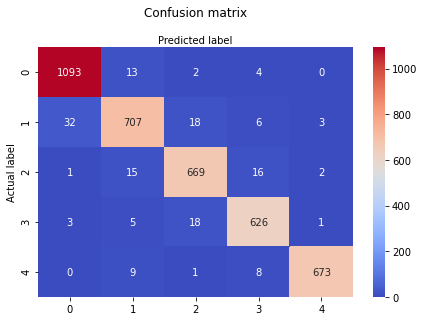

In [178]:
#Predicting y for X_val
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

class_names=[1,2]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [179]:
print("Accuracy Score",accuracy_score(y_test,y_pred));

Accuracy Score 0.96


In [83]:
parameter_grid={'n_estimators':[1,2,100,400,450],'max_depth':[2,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,4,6,8,10],'max_features':[1,2,3,4,5,6,7,8,9,10]}

number_models=8
random_RandomForest_class=RandomizedSearchCV(
    estimator=pipeline['clf'],
    param_distributions=parameter_grid,
    n_iter=number_models,
    scoring='accuracy',
    n_jobs=2,
    cv=4,
    refit=True,
    return_train_score=True)

random_RandomForest_class.fit(X_train,y_train)
predictions=random_RandomForest_class.predict(X)

print("Best params",random_RandomForest_class.best_params_)
print("Best score",random_RandomForest_class.best_score_)

Best params {'n_estimators': 400, 'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 9}
Best score 0.9147602212742749
